In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import dataloader
import modules 
import plots
from trainer import Trainer
import torch 
import matplotlib.pyplot as plt

# Training a Feedforward Neural Network Model to Predict Diabetes Disease Progression

## Testing our model architecture with sythetic linear data

In [3]:
linear_dataset = dataloader.SyntheticLinearData(torch.tensor([0.25, 0.5]), 5)


In [4]:
test_batch = next(iter(linear_dataset.get_dataloader(train=True)))
print(test_batch[0].shape)
print(test_batch[1].shape)

torch.Size([32, 2])
torch.Size([32, 1])


In [5]:
network_architecture = [5]
model = modules.LinearReLUMLP(network_architecture, learning_rate=0.1)

/Users/patrickrowe/miniconda3/envs/main/lib/python3.12/site-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [6]:
trainer = Trainer(max_epochs=10)
trainer.fit(model, linear_dataset)

Model running on cpu

 EPOCH 

Batch: (torch.Size([32, 2]), torch.Size([32, 1]))
net.0.weight tensor([[-0.6681, -0.3779],
        [ 0.3110,  0.3513],
        [-0.4038, -0.8615],
        [ 0.0581, -0.2611],
        [ 1.0639, -0.3325]])
net.0.bias tensor([-0.4904,  0.5041, -2.1809, -0.1681,  0.8495])
net.2.weight tensor([[-0.6527, -3.3388, -6.5363, -1.2656, -0.9909]])
net.2.bias tensor([-9.8002])
Batch: (torch.Size([32, 2]), torch.Size([32, 1]))
net.0.weight tensor([[-0.6543, -0.2526],
        [-0.5560, -0.3424],
        [-0.8824, -1.3110],
        [ 0.0513, -0.1727],
        [ 0.6492,  0.0153]])
net.0.bias tensor([-0.4654, -0.7850, -5.3839, -0.1480,  0.4482])
net.2.weight tensor([[-0.6873, -1.7103, -5.7020, -0.2460, -0.3924]])
net.2.bias tensor([-6.4410])
Batch: (torch.Size([32, 2]), torch.Size([32, 1]))
net.0.weight tensor([[ 0.0290,  0.1356],
        [-0.0612,  0.1747],
        [ 1.3186,  2.7466],
        [ 0.0763,  0.0051],
        [-0.0137, -0.0658]])
net.0.bias tensor([ 0.0036, -0.

In [7]:
y_hat = []
y = []

for batch in linear_dataset.val_dataloader():
    y_hat.extend(model.net(batch[0]).detach().numpy())
    y.extend(batch[-1])

print(y)
print(y_hat)

[tensor([5.1718]), tensor([5.5542]), tensor([4.4660]), tensor([5.3923]), tensor([5.0985]), tensor([5.2498]), tensor([5.6634]), tensor([4.8564]), tensor([4.3240]), tensor([4.3803]), tensor([5.5632]), tensor([5.2318]), tensor([5.0218]), tensor([5.4651]), tensor([4.5904]), tensor([3.8530]), tensor([4.8414]), tensor([5.0867]), tensor([5.4701]), tensor([5.0883]), tensor([4.3257]), tensor([4.8993]), tensor([4.2143]), tensor([5.5741]), tensor([5.4092]), tensor([4.5329]), tensor([4.6151]), tensor([4.8679]), tensor([4.1593]), tensor([4.9238]), tensor([5.5032]), tensor([4.1435]), tensor([4.3025]), tensor([4.8665]), tensor([4.9316]), tensor([5.1389]), tensor([4.1624]), tensor([5.3234]), tensor([5.2239]), tensor([3.5303]), tensor([5.8277]), tensor([5.4005]), tensor([5.2796]), tensor([5.6657]), tensor([4.4031]), tensor([5.2558]), tensor([5.4607]), tensor([4.8473]), tensor([5.0249]), tensor([4.7132]), tensor([4.4272]), tensor([4.6894]), tensor([5.0896]), tensor([5.3277]), tensor([4.9167]), tensor([5

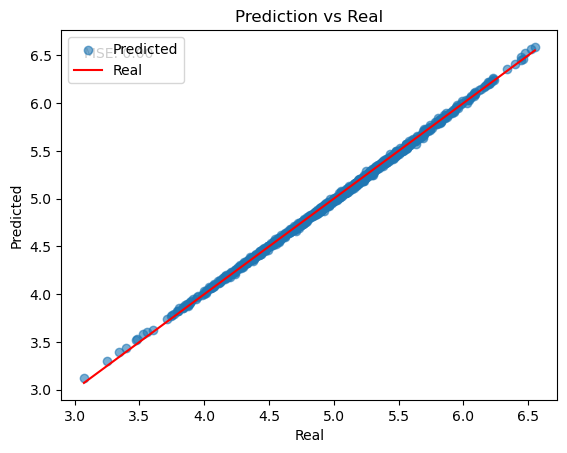

In [8]:
def plot_prediction_vs_real(y_hat, y):
    plt.figure()
    preds = [p.item() for p in y_hat]
    reals = [r.item() for r in y]

    plt.scatter(reals, preds, alpha=0.6, label='Predicted')

    mse = sum((p - r)**2 for p, r in zip(preds, reals)) / len(reals)

    plt.plot([min(reals), max(reals)], [min(reals), max(reals)], color='red', label='Real')

    plt.title('Prediction vs Real')
    plt.xlabel('Real')
    plt.ylabel('Predicted')
    plt.text(min(reals), max(preds), f"MSE: {mse:.2f}", ha='left', va='top')
    plt.legend()
    plt.show()

plot_prediction_vs_real(y_hat, y)

## Load in the data

See `dataloader.py` for implementation details.

In [309]:
diabetes_dataset = dataloader.DiabetesDataset(batch_size=8)

In [310]:
test_batch = next(iter(diabetes_dataset.get_dataloader(train=True)))
print(test_batch[0].shape)
print(test_batch[1].shape)

torch.Size([8, 9])
torch.Size([8, 1])


## Initialise a model

In this implementation, we can specify limited variations on our existing model architecture by passing in a list of integers specifying the shapes of the hidden layers we desire. These will be linear fully connected layers with ReLU activation and a single output node. For example:

```
network_architecture = [50, 50]
model = modules.LinearReLUMLP(network_architecture)

print(model.net)

>>>

ModuleList(
  (0): LazyLinear(in_features=0, out_features=50, bias=True)
  (1): ReLU()
  (2): LazyLinear(in_features=0, out_features=50, bias=True)
  (3): ReLU()
  (4): LazyLinear(in_features=0, out_features=1, bias=True)
)
```

In [311]:
#  a
network_architecture = [16, 4]
model = modules.LinearReLUMLP(network_architecture, learning_rate=0.015)
model.apply_initialization(torch.randn(1, 9))

In [312]:
print(model.net)

Sequential(
  (0): Linear(in_features=9, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=1, bias=True)
)


## Initialise a trainer

The trainer combines our data and model and facilitates the actual training loop.

In [313]:
trainer = Trainer(max_epochs=50)
trainer.fit(model, diabetes_dataset)

Model running on cpu

 EPOCH 

Epoch 1/50, Training Loss: 27907.7033
Epoch 1/50, Validation Loss: 26820.9989

 EPOCH 

Epoch 2/50, Training Loss: 20034.7188
Epoch 2/50, Validation Loss: 12307.5374

 EPOCH 

Epoch 3/50, Training Loss: 6436.6338
Epoch 3/50, Validation Loss: 4535.6329

 EPOCH 

Epoch 4/50, Training Loss: 4054.4726
Epoch 4/50, Validation Loss: 4025.5356

 EPOCH 

Epoch 5/50, Training Loss: 3751.4075
Epoch 5/50, Validation Loss: 3750.9668

 EPOCH 

Epoch 6/50, Training Loss: 3557.2849
Epoch 6/50, Validation Loss: 3515.0435

 EPOCH 

Epoch 7/50, Training Loss: 3452.3501
Epoch 7/50, Validation Loss: 3364.9218

 EPOCH 

Epoch 8/50, Training Loss: 3404.1998
Epoch 8/50, Validation Loss: 3283.0576

 EPOCH 

Epoch 9/50, Training Loss: 3290.1821
Epoch 9/50, Validation Loss: 3176.2795

 EPOCH 

Epoch 10/50, Training Loss: 3259.0121
Epoch 10/50, Validation Loss: 3095.2142

 EPOCH 

Epoch 11/50, Training Loss: 3194.4708
Epoch 11/50, Validation Loss: 3041.1051

 EPOCH 

Epoch 12/50, Tr

tensor(77.2715)
tensor(-664.5463)


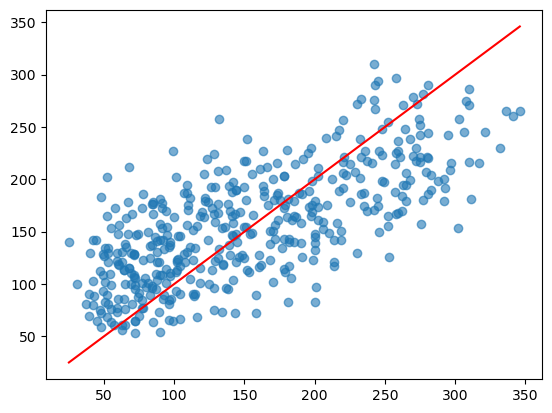

In [ ]:

y = torch.tensor(diabetes_dataset.labels.astype(float), dtype=torch.float32)
y_hat = model(torch.tensor(diabetes_dataset.features.astype(float), dtype=torch.float32))

# mae 
mae = torch.mean(torch.abs(y - y_hat))
print(mae.detach())

# r-squared

from sklearn.metrics import r2_score
r2 = r2_score(y.detach().numpy(), y_hat.detach().numpy())
print(r2)

fig, ax = plt.subplots(ncols=1, nrows=1)

ax.scatter(y.detach().numpy(), y_hat.detach().numpy(), alpha=0.6, label='Predicted')

# add a line
ax.plot([min(y), max(y)], [min(y), max(y)], color='red', label='Real')

In [60]:
def plot_prediction_vs_real(y_hat, y):
    plt.figure()
    preds = [p.item() for p in y_hat]
    reals = [r.item() for r in y]

    plt.scatter(reals, preds, alpha=0.6, label='Predicted')

    mse = sum((p - r)**2 for p, r in zip(preds, reals)) / len(reals)

    plt.plot([min(reals), max(reals)], [min(reals), max(reals)], color='red', label='Real')

    plt.title('Prediction vs Real')
    plt.xlabel('Real')
    plt.ylabel('Predicted')
    plt.text(min(reals), max(preds), f"MSE: {mse:.2f}", ha='left', va='top')
    plt.legend()
    plt.show()

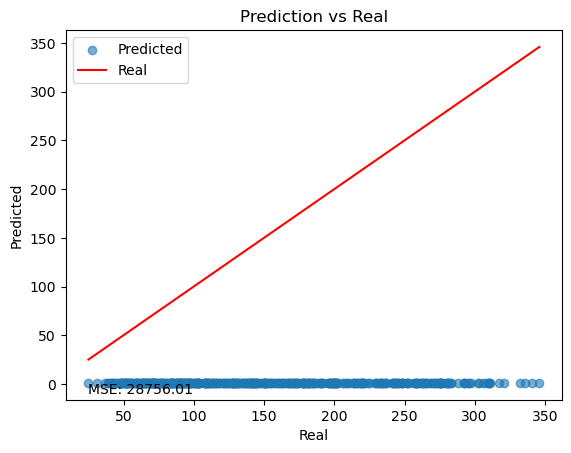

In [52]:
plot_prediction_vs_real(y_hat, y)

In [17]:
data = dataloader.KaggleHouse(batch_size=64)
data.preprocess()

In [18]:
network_architecture = [32, 32]
model = modules.LinearReLUMLP(network_architecture, learning_rate=0.01)

/Users/patrickrowe/miniconda3/envs/main/lib/python3.12/site-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [19]:
trainer = Trainer(max_epochs=50)
trainer.fit(model, data)

Model running on cpu

 EPOCH 

Batch: (torch.Size([64, 330]), torch.Size([64, 1]))
net.0.weight tensor([[ 0.0556, -0.0085, -0.0600,  ...,  0.1650,  0.0434,  0.0000],
        [-0.0428,  0.0071, -0.1272,  ...,  0.6587,  0.0762,  0.0000],
        [-0.0647, -0.0595,  0.0239,  ..., -0.7448, -0.1135,  0.0000],
        ...,
        [ 0.0021, -0.0008, -0.0764,  ..., -0.0543,  0.0195,  0.0000],
        [ 0.0070,  0.1289, -0.0443,  ...,  0.1784,  0.0813,  0.0000],
        [-0.0412, -0.0475,  0.0133,  ..., -0.0720, -0.0036,  0.0000]])
net.0.bias tensor([ 0.2282,  0.8583, -0.9990, -0.1370, -0.2406,  0.1104, -0.0972, -0.1936,
        -0.0627, -0.1844, -0.2181, -0.4207,  0.1998, -0.1909,  0.0765,  0.2773,
        -0.0720,  0.3385, -0.1067,  1.1433, -0.0604, -0.0879, -0.0397,  0.1453,
        -0.6862,  0.2130,  0.5261,  0.0385, -0.0874, -0.0506,  0.2559, -0.0726])
net.2.weight tensor([[-1.0552e-01, -5.5336e-01, -1.9432e-01,  ..., -2.8754e-02,
         -2.7492e-01, -5.4967e-02],
        [ 0.0000e+00, 

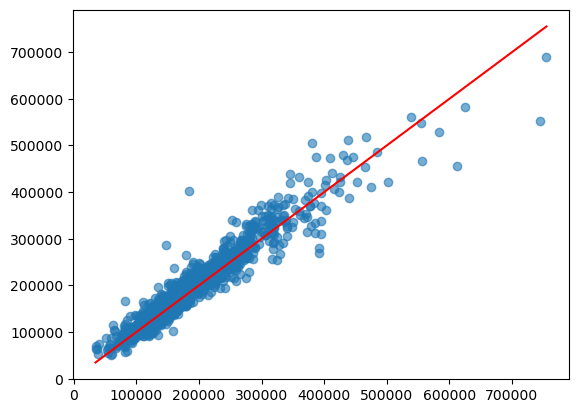

In [20]:

y = torch.tensor(data.train["SalePrice"].values.astype(float), dtype=torch.float32)
y_hat = torch.exp(model(torch.tensor(data.train.drop(columns="SalePrice").values.astype(float), dtype=torch.float32)))

fig, ax = plt.subplots(ncols=1, nrows=1)

ax.scatter(y.detach().numpy(), y_hat.detach().numpy(), alpha=0.6, label='Predicted')

# add a line
ax.plot([min(y), max(y)], [min(y), max(y)], color='red', label='Real')


In [21]:
print(y[:5])
print(y_hat[:5])

tensor([208500., 181500., 223500., 140000., 250000.])
tensor([[219437.4219],
        [208614.0938],
        [221138.4688],
        [176709.7656],
        [305305.8438]], grad_fn=<SliceBackward0>)
